In [1]:
import cv2
import imutils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
sq_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

In [3]:
# load in image
image = cv2.imread('credit_cards/creditcard1.jpeg')

# resize image
image = imutils.resize(image, width=300)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# change color from BGR to GRAYSCALE
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

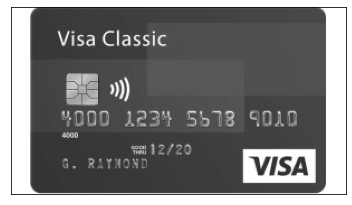

In [4]:
# show the image in grayscale
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

In [5]:
# the tophat morphological operation reveals light regions on a dark background
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rect_kernel)

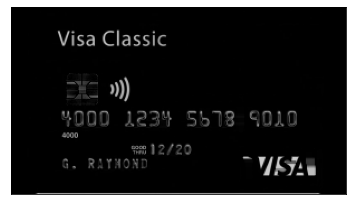

In [6]:
# show the image in grayscale
plt.imshow(tophat, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

In [7]:
gradX = cv2.Sobel(tophat, ddepth=cv2.CV_32F, dx=1, dy=0,
	ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = (255 * ((gradX - minVal) / (maxVal - minVal)))
gradX = gradX.astype("uint8")

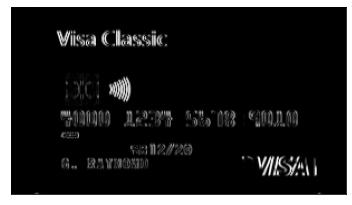

In [8]:
# show the image in grayscale
plt.imshow(gradX, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

In [9]:
# apply a closing operation using the rectangular kernel to help
# cloes gaps in between credit card number digits, then apply
# Otsu's thresholding method to binarize the image
gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rect_kernel)
thresh = cv2.threshold(gradX, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# apply a second closing operation to the binary image, again
# to help close gaps between credit card number regions
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sq_kernel)

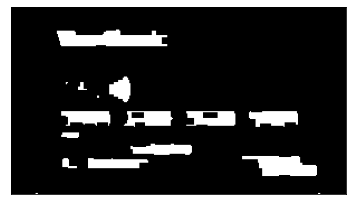

In [10]:
# show the image in grayscale
plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

In [11]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
locs = []
n_cnts = []

In [12]:
for c in cnts:
	# translate the contours into simpler bounding box
	(x, y, w, h) = cv2.boundingRect(c)
	ar = w / float(h)

	# we can select the desired bounding boxes for the digits by
	# looking at a combination of the aspect ratio & height & width
	if (ar > 2.5 and ar < 4.0) and ((w > 40 and w < 55) and (h > 10 and h < 20)):
		# also adding a bit of padding/extra room to the bounding rectangle
		# just based from playing around with it a bit
		locs.append((x-2, y-2, w+4, h+4))
			

In [13]:
for loc in locs:
    with_boxes = cv2.rectangle(image, (loc[0], loc[1]), (loc[0] + loc[2], loc[1] + loc[3]), (255, 0, 0), 2)

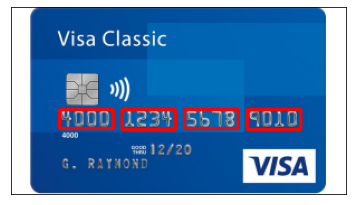

In [14]:
# show the image in grayscale
plt.imshow(with_boxes, vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()